In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
train_df = pd.read_csv('./datasets/linear/train.csv')
np.random.shuffle(train_df.values)

In [7]:
train_df

,x0,x1,label
0,-3.130815,-2.764355,0
1,-4.704166,-2.061177,0
2,3.253220,-2.016516,1
3,-1.049724,-3.705425,0
4,-2.605463,-4.632625,0
...,...,...,...
3995,4.277258,-3.423674,1
3996,-1.623847,-3.993608,0
3997,-2.315224,-3.549518,0
3998,-2.086988,-3.803135,0


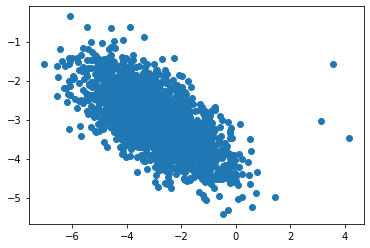

In [31]:
mask = train_df['label'] == 0
data = train_df[mask]
plt.scatter(data['x0'],data['x1'])


In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

In [39]:
class LinearRegression:
   def fit(self,X,Y):
       X=np.array(X).reshape(-1,1)
       Y=np.array(Y).reshape(-1,1)
       x_shape = X.shape
       self.parameter_cache = []
       num_var = x_shape[1]       #the shape corresponds to number of input variable dimensions. There’s only one for this dataset i.e weight of person
       self.weight_matrix = np.random.normal(-1,1,(num_var,1))
       self.intercept = np.random.rand(1)
       for i in range(50):
           self.dcostdm = np.sum(np.multiply(((np.matmul(X,self.weight_matrix)+self.intercept)-Y),X))*2/x_shape[0] #w.r.t to the weight
           self.dcostdc = np.sum(((np.matmul(X,self.weight_matrix)+self.intercept)-Y))*2/x_shape[0]          #partial derivative of cost w.r.t the intercept
           self.weight_matrix -= 0.1*self.dcostdm                                                                  #updating the weights with the calculated gradients
           self.intercept -= 0.1*self.dcostdc                                                                      #updating the weights with the calculated gradients
           self.parameter_cache.append(np.array((self.weight_matrix,self.intercept)))                             #the parameters are cached just to track the progress
       return self.weight_matrix,self.intercept,self.parameter_cache
   def predict(self,X):
       product = np.matmul(np.array(X).reshape(-1,1),self.weight_matrix)+self.intercept
       return product

/var/folders/q5/j0xfllfx0cqdzv6rkf9t2r9w0000gn/T/ipykernel_10245/385773554.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.parameter_cache.append(np.array((self.weight_matrix,self.intercept)))                             #the parameters are cached just to track the progress


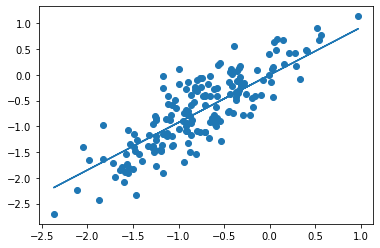

In [40]:
reg = LinearRegression()
x = (df['Weight']-df['Weight'].mean())/df['Weight'].std() #standardization of the dataset
y = (df['Height']-df['Height'].mean())/df['Height'].std() #standardization of the dataset
params = reg.fit(x[:-180],y[:-180])

pred = reg.predict(np.array(x[-180:]))

plt.scatter(x[-180:],y[-180:])

plt.plot(x[-180:],pred)


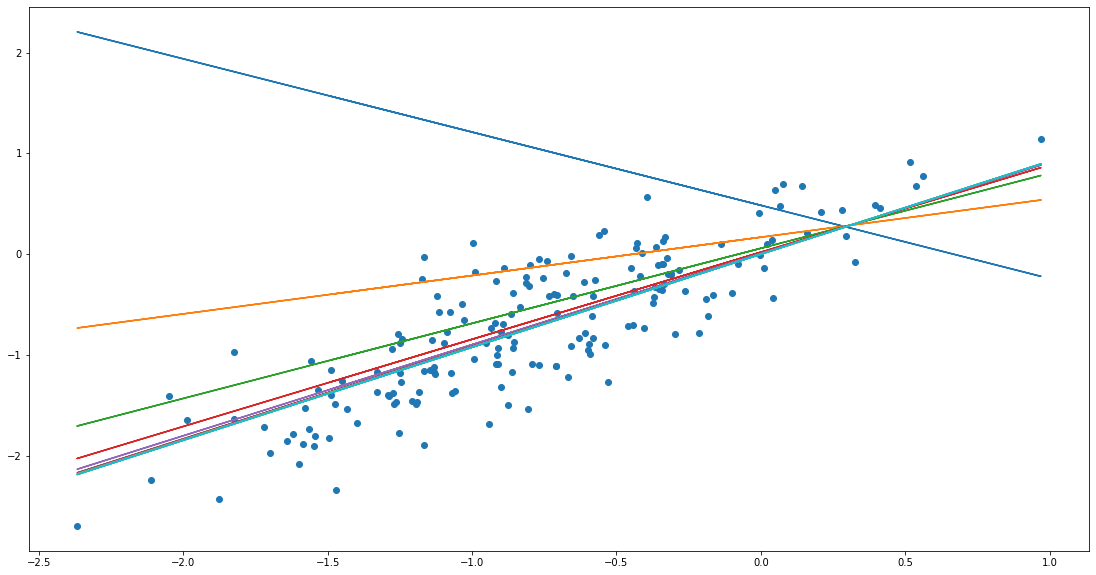

In [41]:
plt.figure(figsize=(19, 10))
plt.scatter(x[-180:],y[-180:])
for i in list(np.arange(0,50,5)):
 
  value = params[2][i]
  prediction = np.matmul(np.array(x[-180:]).reshape(-1,1),value[0])+value[1]
  plt.plot(x[-180:],prediction)